# MLC Project by NaN Nagini

#### First we import the 100,000 row dataset (source: Andrew Mitchell at Mechanical Licensing Collective)
- Task: Investigate the Songwriter's Listed column and find patterns from that

In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import mlc_data.csv
mlc_df = pd.read_csv("../data/mlc_data.csv")
mlc_df.head()

,If,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


## Clean up dataset

In [3]:
# Abi: Rename column If to ISRC -- ORIGINAL 'If ' column HAS A SPACE after it!!
mlc_df.columns = ['ISRC', 'Country', 'Registrant', 'Release_Year', 'Period', 'DSP', 'Streams', 'Artist', 'Label', 'Song', 'Album', 'Duration', 'Songwriter?']
mlc_df.head()

,ISRC,Country,Registrant,Release_Year,Period,DSP,Streams,Artist,Label,Song,Album,Duration,Songwriter?
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [4]:
# Abi: Change all Stream values to numeric without the comma
mlc_df["Streams"] = mlc_df["Streams"].str.replace(",", "") # Remove comma
mlc_df["Streams"] = mlc_df["Streams"].str.replace(" ", "") # Remove any spaces
mlc_df[["Streams"]] = mlc_df[["Streams"]].apply(pd.to_numeric) # Cast to numerical datatype to do calculations
mlc_df.head()

,ISRC,Country,Registrant,Release_Year,Period,DSP,Streams,Artist,Label,Song,Album,Duration,Songwriter?
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [5]:
# Inspecting mlc_df after data cleaning
print(mlc_df.shape) # 100,000 rows and 13 columns
print(mlc_df.dtypes)

(100000, 13)
ISRC             object
Country          object
Registrant       object
Release_Year    float64
Period           object
DSP              object
Streams           int64
Artist           object
Label            object
Song             object
Album            object
Duration          int64
Songwriter?       int64
dtype: object


In [6]:
# Rudy: More info
mlc_df.describe()

,Release_Year,Streams,Duration,Songwriter?
count,98239.000000,1.000000e+05,100000.000000,100000.000000
mean,19.671933,5.626550e+04,1016.893690,0.541610
std,12.638870,2.620276e+05,15565.692133,0.498268
min,0.000000,1.000000e+00,0.000000,0.000000
25%,17.000000,6.807000e+03,149.000000,0.000000
50%,19.000000,1.677250e+04,190.000000,1.000000
75%,20.000000,3.990300e+04,236.000000,1.000000
max,99.000000,2.145617e+07,818738.000000,1.000000


## Exploring the dataset

In [7]:
# Most popular streaming platform by number of records in the dataframe
DSP_counts = mlc_df['DSP'].value_counts()
print(DSP_counts)

Spotify               32268
Apple                 22200
Amazon                14438
Pandora               13777
Tidal                  3521
YouTube                2752
SoundCloud             2122
GTL                    1090
Melodyv                 829
Trebel                  817
iHeart Radio            707
AudioMack               550
NugsNet                 316
LiveXLive               200
Qoboz                   104
Midwest Tape            102
Deezer                   51
Anghami                  46
Sonos                    23
Recisio                  22
Smithsonian              21
Ultimate Guitar          19
PowerMusic                8
Wolfgangs                 4
Fan Label                 4
MixCloud                  4
Pacemaker                 3
Classical Archives        2
MonkingMe                 1
Name: DSP, dtype: int64


In [8]:
# Patrick: Most popular streaming platform by number of records in the dataframe with non-US (foreign) country code
# foreign = mlc_df.loc[mlc_df['Country']!= 'US']
# foreign['DSP'].value_counts()

## 3 DATAFRAMES: rows_per_DSP, streams_per_DSP, songwriter_df


## songwriter_df dataframe

In [9]:
# Likelihood of each DSP to provide songwriter info

mlc_df["Songwriter?"] = pd.to_numeric(mlc_df["Songwriter?"]*100)
sw_ratio = mlc_df.groupby('DSP')['Songwriter?'].mean()
sw_ratio = sw_ratio.sort_values(ascending=False)
print(sw_ratio)

DSP
Classical Archives    100.000000
Qoboz                  90.384615
Deezer                 86.274510
Spotify                85.437585
Apple                  80.851351
Recisio                54.545455
Amazon                 26.173985
Pandora                24.482834
Melodyv                11.459590
LiveXLive               7.000000
GTL                     2.844037
Tidal                   0.369213
Smithsonian             0.000000
Ultimate Guitar         0.000000
Trebel                  0.000000
Wolfgangs               0.000000
SoundCloud              0.000000
Sonos                   0.000000
YouTube                 0.000000
Pacemaker               0.000000
PowerMusic              0.000000
Anghami                 0.000000
NugsNet                 0.000000
MonkingMe               0.000000
MixCloud                0.000000
Midwest Tape            0.000000
Fan Label               0.000000
AudioMack               0.000000
iHeart Radio            0.000000
Name: Songwriter?, dtype: float64


In [10]:
# Make sw_ratio into songwriter_df with new index and DSP column and SW_Avg column
songwriter_df = pd.DataFrame(sw_ratio)
songwriter_df.reset_index(inplace=True)
songwriter_df.columns = ['DSP', 'SW_Avg']
print(songwriter_df)

                   DSP      SW_Avg
0   Classical Archives  100.000000
1                Qoboz   90.384615
2               Deezer   86.274510
3              Spotify   85.437585
4                Apple   80.851351
5              Recisio   54.545455
6               Amazon   26.173985
7              Pandora   24.482834
8              Melodyv   11.459590
9            LiveXLive    7.000000
10                 GTL    2.844037
11               Tidal    0.369213
12         Smithsonian    0.000000
13     Ultimate Guitar    0.000000
14              Trebel    0.000000
15           Wolfgangs    0.000000
16          SoundCloud    0.000000
17               Sonos    0.000000
18             YouTube    0.000000
19           Pacemaker    0.000000
20          PowerMusic    0.000000
21             Anghami    0.000000
22             NugsNet    0.000000
23           MonkingMe    0.000000
24            MixCloud    0.000000
25        Midwest Tape    0.000000
26           Fan Label    0.000000
27           AudioMa

## streams_per_DSP dataframe

In [11]:
# Number/sum of streams per DSP
streams_per_DSP = mlc_df.groupby('DSP')['Streams'].sum()
streams_per_DSP = streams_per_DSP.sort_values(ascending=False)
print(streams_per_DSP)

DSP
Spotify               2552563722
Apple                 1606453701
Pandora                874236566
SoundCloud             166813813
YouTube                158031119
Amazon                 151199800
Tidal                   48793126
AudioMack               11991559
Melodyv                  5384657
iHeart Radio             2141959
GTL                      1280764
Trebel                    149347
NugsNet                   110709
LiveXLive                 101307
Deezer                     87830
Midwest Tape               85708
Anghami                    34682
Sonos                      31402
Qoboz                       6621
MonkingMe                   3549
PowerMusic                  3154
MixCloud                    2661
Pacemaker                   1707
Wolfgangs                    965
Ultimate Guitar              309
Smithsonian                  208
Fan Label                     91
Recisio                       29
Classical Archives            20
Name: Streams, dtype: int64


In [12]:
streams_df = pd.DataFrame(streams_per_DSP)
streams_df.reset_index(inplace=True)
streams_df.columns = ['DSP', 'Streams_Per_DSP']
print(streams_df)

                   DSP  Streams_Per_DSP
0              Spotify       2552563722
1                Apple       1606453701
2              Pandora        874236566
3           SoundCloud        166813813
4              YouTube        158031119
5               Amazon        151199800
6                Tidal         48793126
7            AudioMack         11991559
8              Melodyv          5384657
9         iHeart Radio          2141959
10                 GTL          1280764
11              Trebel           149347
12             NugsNet           110709
13           LiveXLive           101307
14              Deezer            87830
15        Midwest Tape            85708
16             Anghami            34682
17               Sonos            31402
18               Qoboz             6621
19           MonkingMe             3549
20          PowerMusic             3154
21            MixCloud             2661
22           Pacemaker             1707
23           Wolfgangs              965


## rows_per_DSP dataframe

In [13]:
# Number of recordings (rows) per DSP
rows_per_DSP = mlc_df['DSP'].value_counts()
print(rows_per_DSP)

Spotify               32268
Apple                 22200
Amazon                14438
Pandora               13777
Tidal                  3521
YouTube                2752
SoundCloud             2122
GTL                    1090
Melodyv                 829
Trebel                  817
iHeart Radio            707
AudioMack               550
NugsNet                 316
LiveXLive               200
Qoboz                   104
Midwest Tape            102
Deezer                   51
Anghami                  46
Sonos                    23
Recisio                  22
Smithsonian              21
Ultimate Guitar          19
PowerMusic                8
Wolfgangs                 4
Fan Label                 4
MixCloud                  4
Pacemaker                 3
Classical Archives        2
MonkingMe                 1
Name: DSP, dtype: int64


In [14]:
rows_df = pd.DataFrame(rows_per_DSP)
rows_df.reset_index(inplace=True)
rows_df.columns = ['DSP', 'Songs_Per_DSP'] # Changed from Rows_Per_DSP to Songs_Per_DSP
print(rows_df)

                   DSP  Songs_Per_DSP
0              Spotify          32268
1                Apple          22200
2               Amazon          14438
3              Pandora          13777
4                Tidal           3521
5              YouTube           2752
6           SoundCloud           2122
7                  GTL           1090
8              Melodyv            829
9               Trebel            817
10        iHeart Radio            707
11           AudioMack            550
12             NugsNet            316
13           LiveXLive            200
14               Qoboz            104
15        Midwest Tape            102
16              Deezer             51
17             Anghami             46
18               Sonos             23
19             Recisio             22
20         Smithsonian             21
21     Ultimate Guitar             19
22          PowerMusic              8
23           Wolfgangs              4
24           Fan Label              4
25          

## Merge the three dataframes together on DSP

In [15]:
DSP_df1 = pd.merge(songwriter_df, streams_df, on=['DSP'], how='inner')
print(DSP_df1)

                   DSP      SW_Avg  Streams_Per_DSP
0   Classical Archives  100.000000               20
1                Qoboz   90.384615             6621
2               Deezer   86.274510            87830
3              Spotify   85.437585       2552563722
4                Apple   80.851351       1606453701
5              Recisio   54.545455               29
6               Amazon   26.173985        151199800
7              Pandora   24.482834        874236566
8              Melodyv   11.459590          5384657
9            LiveXLive    7.000000           101307
10                 GTL    2.844037          1280764
11               Tidal    0.369213         48793126
12         Smithsonian    0.000000              208
13     Ultimate Guitar    0.000000              309
14              Trebel    0.000000           149347
15           Wolfgangs    0.000000              965
16          SoundCloud    0.000000        166813813
17               Sonos    0.000000            31402
18          

In [16]:
DSP_df2 = pd.merge(DSP_df1, rows_df, on=['DSP'], how='inner')
print(DSP_df2)

                   DSP      SW_Avg  Streams_Per_DSP  Songs_Per_DSP
0   Classical Archives  100.000000               20              2
1                Qoboz   90.384615             6621            104
2               Deezer   86.274510            87830             51
3              Spotify   85.437585       2552563722          32268
4                Apple   80.851351       1606453701          22200
5              Recisio   54.545455               29             22
6               Amazon   26.173985        151199800          14438
7              Pandora   24.482834        874236566          13777
8              Melodyv   11.459590          5384657            829
9            LiveXLive    7.000000           101307            200
10                 GTL    2.844037          1280764           1090
11               Tidal    0.369213         48793126           3521
12         Smithsonian    0.000000              208             21
13     Ultimate Guitar    0.000000              309           

## THIS IS THE MASTER DATAFRAME:

In [17]:
# Reorder by Streams_Per_DSP in descending order = FINAL MERGED DATAFRAME
DSP_df2 = DSP_df2.sort_values(by=['Streams_Per_DSP'], ascending=False)
print(DSP_df2)

                   DSP      SW_Avg  Streams_Per_DSP  Songs_Per_DSP
3              Spotify   85.437585       2552563722          32268
4                Apple   80.851351       1606453701          22200
7              Pandora   24.482834        874236566          13777
16          SoundCloud    0.000000        166813813           2122
18             YouTube    0.000000        158031119           2752
6               Amazon   26.173985        151199800          14438
11               Tidal    0.369213         48793126           3521
27           AudioMack    0.000000         11991559            550
8              Melodyv   11.459590          5384657            829
28        iHeart Radio    0.000000          2141959            707
10                 GTL    2.844037          1280764           1090
14              Trebel    0.000000           149347            817
22             NugsNet    0.000000           110709            316
9            LiveXLive    7.000000           101307           

In [18]:
chart_top_7 = DSP_df2[['DSP','Streams_Per_DSP']]
chart_top_7.head(7)

,DSP,Streams_Per_DSP
3,Spotify,2552563722
4,Apple,1606453701
7,Pandora,874236566
16,SoundCloud,166813813
18,YouTube,158031119
6,Amazon,151199800
11,Tidal,48793126


## Redid the messed up plot below AND it looks even better so ha

In [19]:
# Plot top 7 by Streams
top_7 = DSP_df2.head(7)
print(top_7)

           DSP     SW_Avg  Streams_Per_DSP  Songs_Per_DSP
3      Spotify  85.437585       2552563722          32268
4        Apple  80.851351       1606453701          22200
7      Pandora  24.482834        874236566          13777
16  SoundCloud   0.000000        166813813           2122
18     YouTube   0.000000        158031119           2752
6       Amazon  26.173985        151199800          14438
11       Tidal   0.369213         48793126           3521


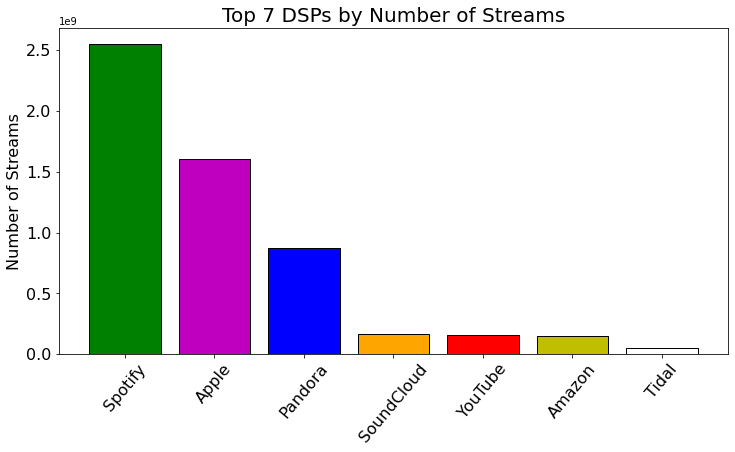

In [20]:
plt.figure(figsize=(12, 6))
plt.bar(top_7.DSP, top_7.Streams_Per_DSP, color=['g', 'm', 'b', 'orange', 'r', 'y', '1'], edgecolor='black')
plt.ylabel('Number of Streams', fontsize=16) # Number of Streams times 10^9
plt.xticks(rotation = 50, fontsize=16)
plt.yticks(fontsize=16)
plt.title('Top 7 DSPs by Number of Streams', fontsize=20);

In [21]:
SW_avg_df = DSP_df2.sort_values(by=['SW_Avg'], ascending=False)
print(SW_avg_df)

                   DSP      SW_Avg  Streams_Per_DSP  Songs_Per_DSP
0   Classical Archives  100.000000               20              2
1                Qoboz   90.384615             6621            104
2               Deezer   86.274510            87830             51
3              Spotify   85.437585       2552563722          32268
4                Apple   80.851351       1606453701          22200
5              Recisio   54.545455               29             22
6               Amazon   26.173985        151199800          14438
7              Pandora   24.482834        874236566          13777
8              Melodyv   11.459590          5384657            829
9            LiveXLive    7.000000           101307            200
10                 GTL    2.844037          1280764           1090
11               Tidal    0.369213         48793126           3521
20          PowerMusic    0.000000             3154              8
26           Fan Label    0.000000               91           

In [22]:
# Subset the top 7 DSPs by streams to include only those top 7 we want by SW_Avg desc
top_7_sw = SW_avg_df.loc[SW_avg_df['DSP'].isin(['Spotify','Apple', 'Pandora', 'SoundCloud', 'YouTube', 'Amazon', 'Tidal'])]
print(top_7_sw)

           DSP     SW_Avg  Streams_Per_DSP  Songs_Per_DSP
3      Spotify  85.437585       2552563722          32268
4        Apple  80.851351       1606453701          22200
6       Amazon  26.173985        151199800          14438
7      Pandora  24.482834        874236566          13777
11       Tidal   0.369213         48793126           3521
16  SoundCloud   0.000000        166813813           2122
18     YouTube   0.000000        158031119           2752


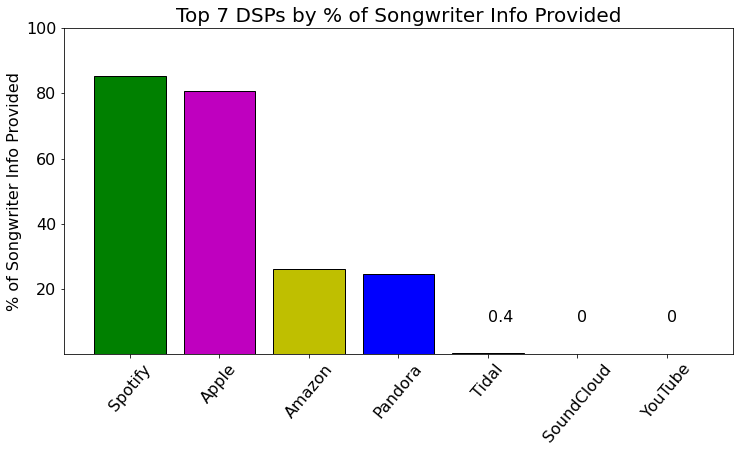

In [23]:
# Plot top 7 by SW_Avg
plt.figure(figsize=(12, 6))
plt.bar(top_7_sw.DSP, top_7_sw.SW_Avg, color=['g', 'm', 'y', 'b', '1', 'orange', 'r'], edgecolor='black')
plt.ylabel('% of Songwriter Info Provided', fontsize=16)
plt.xticks(rotation = 50, fontsize=16)
plt.yticks([20, 40, 60, 80, 100], fontsize=16)
plt.text('YouTube', 10, '0', fontsize=16)
plt.text('SoundCloud', 10, '0', fontsize=16)
plt.text('Tidal', 10, '0.4', fontsize=16)
plt.title('Top 7 DSPs by % of Songwriter Info Provided', fontsize=20);

In [24]:
# Subset the DSPs by Songs_Per_DSP
Songs_Per_DSP_df = DSP_df2.sort_values(by=['Songs_Per_DSP'], ascending=False)
print(Songs_Per_DSP_df)

                   DSP      SW_Avg  Streams_Per_DSP  Songs_Per_DSP
3              Spotify   85.437585       2552563722          32268
4                Apple   80.851351       1606453701          22200
6               Amazon   26.173985        151199800          14438
7              Pandora   24.482834        874236566          13777
11               Tidal    0.369213         48793126           3521
18             YouTube    0.000000        158031119           2752
16          SoundCloud    0.000000        166813813           2122
10                 GTL    2.844037          1280764           1090
8              Melodyv   11.459590          5384657            829
14              Trebel    0.000000           149347            817
28        iHeart Radio    0.000000          2141959            707
27           AudioMack    0.000000         11991559            550
22             NugsNet    0.000000           110709            316
9            LiveXLive    7.000000           101307           

In [25]:
top_7_sdp = Songs_Per_DSP_df.loc[Songs_Per_DSP_df['DSP'].isin(['Spotify','Apple', 'Pandora', 'SoundCloud', 'YouTube', 'Amazon', 'Tidal'])]
print(top_7_sdp)

           DSP     SW_Avg  Streams_Per_DSP  Songs_Per_DSP
3      Spotify  85.437585       2552563722          32268
4        Apple  80.851351       1606453701          22200
6       Amazon  26.173985        151199800          14438
7      Pandora  24.482834        874236566          13777
11       Tidal   0.369213         48793126           3521
18     YouTube   0.000000        158031119           2752
16  SoundCloud   0.000000        166813813           2122


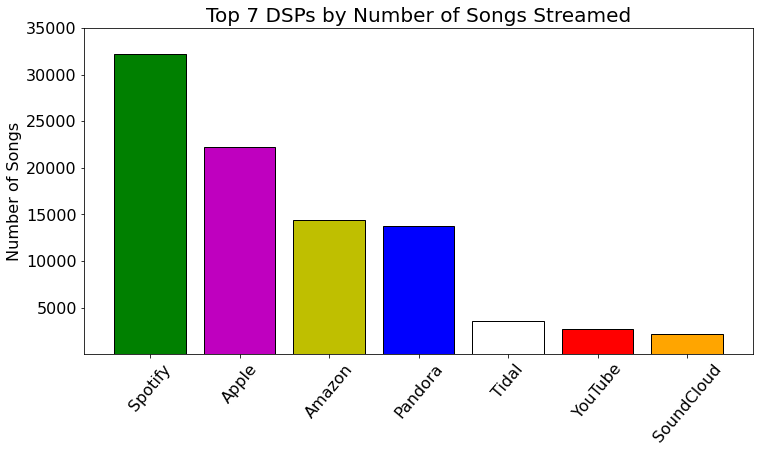

In [26]:
# Plot top 7 by Songs_Per_DSP
plt.figure(figsize=(12, 6))
plt.bar(top_7_sdp.DSP, top_7_sdp.Songs_Per_DSP, color=['g', 'm', 'y', 'b', '1', 'r', 'orange'], edgecolor='black')
plt.ylabel('Number of Songs', fontsize=16)
plt.xticks(rotation = 50, fontsize=16)
plt.yticks([5000, 10000, 15000, 20000, 25000, 30000, 35000], fontsize=16)
plt.title('Top 7 DSPs by Number of Songs Streamed', fontsize=20);

### The 3 plots above reset their style?? Idk what happened but at least they don't look too bad.

## Patrick's label by number of streams plot

In [27]:
mlc_df.Label.value_counts()

Atlantic Records                      1384
Lofi Records                          1232
Warner Records                         995
Columbia                               843
Universal                              818
                                      ... 
Twenty7 Records / Human Re Sources       1
Hip-O Select / Motown                    1
NyxTheShield                             1
Relaxing Sounds For Studying             1
Universal Music Taiwan                   1
Name: Label, Length: 11777, dtype: int64

In [28]:
streams_per_Label=mlc_df.groupby('Label')['Streams'].sum()
streams_per_Label=streams_per_Label.sort_values(ascending=False)
print(streams_per_Label)

Label
Atlantic Records                                 172396961
Columbia                                         131147208
300 Entertainment                                 96692925
Alamo (Geffen Records)                            88320747
Taylor Swift                                      77937703
                                                   ...    
712847 Records DK                                        1
Deen Chaser / Rapbay / Urbanlife Distribution            1
Speeches Inc.                                            1
APM Music                                                1
Dj Shaggy                                                1
Name: Streams, Length: 11777, dtype: int64


In [29]:
Label_ratio = mlc_df.groupby('Label')['Songwriter?'].mean()
Label_ratio = Label_ratio.sort_values(ascending=False)

In [30]:
Label_df = pd.merge(streams_per_Label, Label_ratio, on=['Label'], how='inner')
print(Label_df)

                                                 Streams  Songwriter?
Label                                                                
Atlantic Records                               172396961    48.410405
Columbia                                       131147208    87.544484
300 Entertainment                               96692925    27.860697
Alamo (Geffen Records)                          88320747    63.905325
Taylor Swift                                    77937703    42.965779
...                                                  ...          ...
712847 Records DK                                      1     0.000000
Deen Chaser / Rapbay / Urbanlife Distribution          1     0.000000
Speeches Inc.                                          1     0.000000
APM Music                                              1     0.000000
Dj Shaggy                                              1     0.000000

[11777 rows x 2 columns]


In [31]:
Label_df.reset_index(inplace=True)
Label_df = Label_df.rename(columns = {'index': "Label"})
print(Label_df)

                                               Label    Streams  Songwriter?
0                                   Atlantic Records  172396961    48.410405
1                                           Columbia  131147208    87.544484
2                                  300 Entertainment   96692925    27.860697
3                             Alamo (Geffen Records)   88320747    63.905325
4                                       Taylor Swift   77937703    42.965779
...                                              ...        ...          ...
11772                              712847 Records DK          1     0.000000
11773  Deen Chaser / Rapbay / Urbanlife Distribution          1     0.000000
11774                                  Speeches Inc.          1     0.000000
11775                                      APM Music          1     0.000000
11776                                      Dj Shaggy          1     0.000000

[11777 rows x 3 columns]


In [32]:
radiohead = Label_df.head(7)
print(radiohead)

                    Label    Streams  Songwriter?
0        Atlantic Records  172396961    48.410405
1                Columbia  131147208    87.544484
2       300 Entertainment   96692925    27.860697
3  Alamo (Geffen Records)   88320747    63.905325
4            Taylor Swift   77937703    42.965779
5           Alamo Records   72800179    61.510791
6            Lofi Records   69694317    98.701299


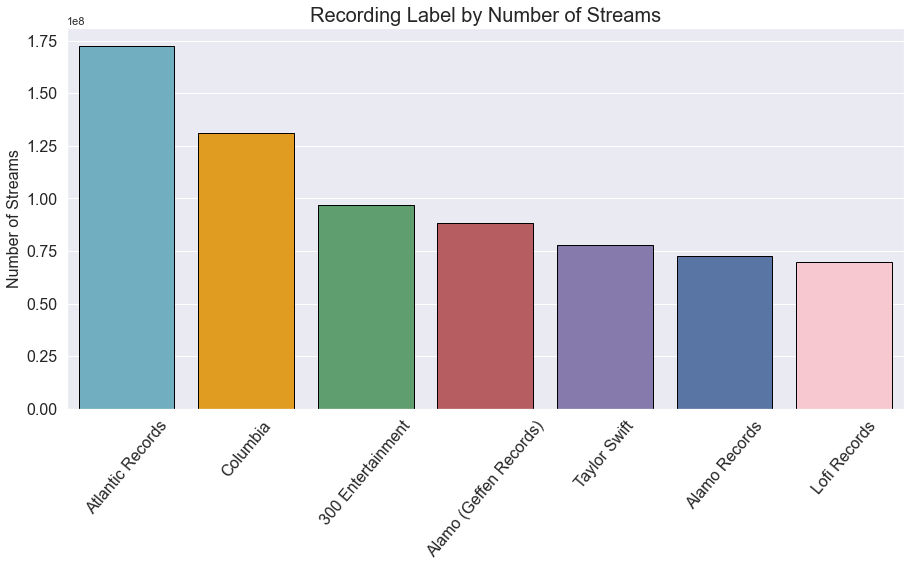

In [33]:
sns.set_theme(style="darkgrid")


# Plot the responses for different events and regions
plt.gcf().set_size_inches(15,7) # Rudy: Make it bigger
sns.barplot(x="Label", y="Streams", data=radiohead, palette=['c','orange','g','r','m','b','pink'], edgecolor='black')
plt.title('Recording Label by Number of Streams', fontsize=20)
plt.xticks(rotation=50, fontsize=16)
plt.xlabel('', fontsize=0) # Rudy: Zero it out of existence lol
plt.ylabel('Number of Streams', fontsize=16)
plt.yticks(fontsize=16);

## Rudy's label by Songwriter? plot

In [34]:
sw_per_Label=mlc_df.groupby('Label')['Songwriter?'].sum()
sw_per_Label=sw_per_Label.sort_values(ascending=False)
print(sw_per_Label)

Label
Lofi Records                             121600
Columbia                                  73800
Filtr                                     71300
Atlantic Records                          67000
Warner Records                            54000
                                          ...  
Mali Abad                                     0
Malek Ghazi Monzer                            0
Makeus Entertainment, The Black Label         0
MakeCent$ Records / MAJAMA ENT.               0
🧿RCCJAY🧿                                      0
Name: Songwriter?, Length: 11777, dtype: int64


In [35]:
Top_7_Labels = Label_df.sort_values(by='Songwriter?', ascending=False)
Top_7_Labels = Top_7_Labels[Top_7_Labels['Label'].isin(['Atlantic Records', 'Columbia', '300 Entertainment','Lofi Records', 'Alamo (Geffen Records)','Alamo Records', 'Taylor Swift'])]
Top_7_Labels

,Label,Streams,Songwriter?
6,Lofi Records,69694317,98.701299
1,Columbia,131147208,87.544484
3,Alamo (Geffen Records),88320747,63.905325
5,Alamo Records,72800179,61.510791
0,Atlantic Records,172396961,48.410405
4,Taylor Swift,77937703,42.965779
2,300 Entertainment,96692925,27.860697


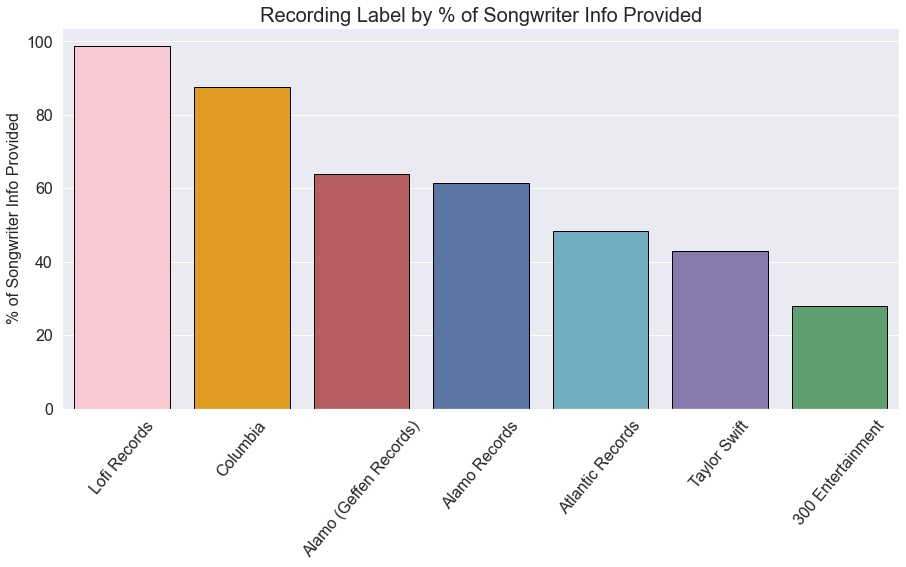

In [36]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=1)
sns.barplot(x="Label", y="Songwriter?", data=Top_7_Labels, palette=['pink','orange','r','b','c','m','g'], edgecolor='black')
plt.title('Recording Label by % of Songwriter Info Provided', fontsize=20)
plt.xticks(rotation=50, fontsize=16)
plt.xlabel('', fontsize=0)
plt.ylabel('% of Songwriter Info Provided', fontsize=16)
plt.yticks(fontsize=16)
plt.gcf().set_size_inches(15,7)

# Ignore this bottom stuff (it was initial analysis)

## Exploring US only data

In [37]:
# Subset mlc_df to make a US only df
# US_df = mlc_df.loc[mlc_df['Country']== 'US']
# US_df.head()

In [38]:
# Top 5 streamed songs in US
# US_df.sort_values('Streams', ascending=False).head()

In [39]:
# Patrick: Most popular US streaming platform by number of records
# US_DSP = mlc_df.loc[mlc_df['Country']== 'US']
# US_DSP['DSP'].value_counts()

## Exploring foreign (non-US) data

In [40]:
# Subset mlc_df to make a non-US df
# foreign_df = mlc_df.loc[mlc_df['Country']== 'US']
# foreign_df.head()

In [41]:
# Top 5 foreign (non-US) streamed songs
# foreign_df.sort_values('Streams', ascending=False).head()

In [42]:
# Most popular foreign (non-US) streaming platform by number of records
# foreign_DSP = mlc_df.loc[mlc_df['Country']!= 'US']
# foreign_DSP['DSP'].value_counts()